# Data Collection

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [43]:
data1 = pd.read_csv("D:\Intern Samurai\Datasets\iris\iris.data",header=None)

In [44]:
data1.columns = ['sepallengthincm', 'sepallwidthincm', 'petallengthincm', 'petallwidthincm', 'species']

# Data Exploration

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepallengthincm  150 non-null    float64
 1   sepallwidthincm  150 non-null    float64
 2   petallengthincm  150 non-null    float64
 3   petallwidthincm  150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
data1.head()

,sepallengthincm,sepallwidthincm,petallengthincm,petallwidthincm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data1.tail()

,sepallengthincm,sepallwidthincm,petallengthincm,petallwidthincm,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
data1.shape

(150, 5)

In [49]:
data1['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
#null values
data1.isnull().sum()

sepallengthincm    0
sepallwidthincm    0
petallengthincm    0
petallwidthincm    0
species            0
dtype: int64

In [51]:
data1.describe()

,sepallengthincm,sepallwidthincm,petallengthincm,petallwidthincm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


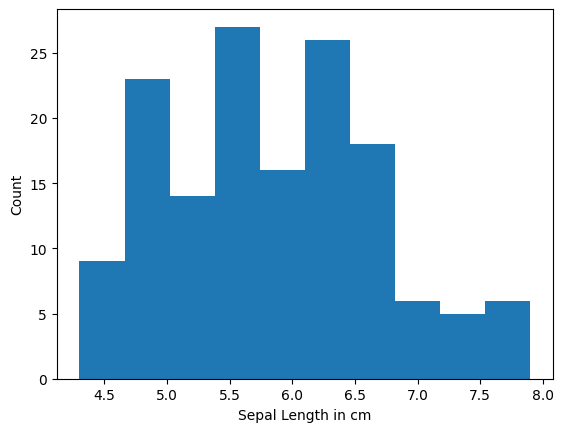

In [52]:
# histogram of sepal length
plt.hist(data1['sepallengthincm'])
plt.xlabel('Sepal Length in cm')
plt.ylabel('Count')
plt.show()

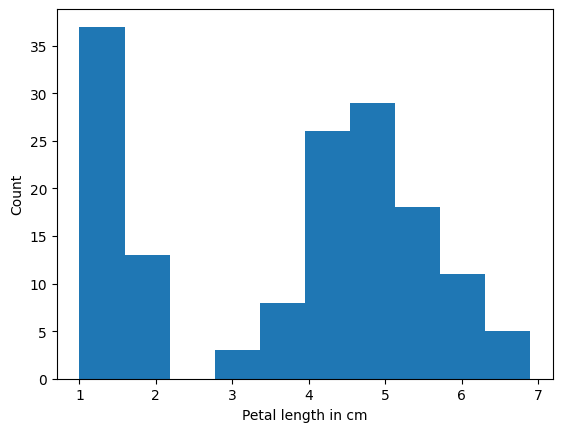

In [53]:
# histogram of petal length
plt.hist(data1['petallengthincm'])
plt.xlabel('Petal length in cm')
plt.ylabel('Count')
plt.show()

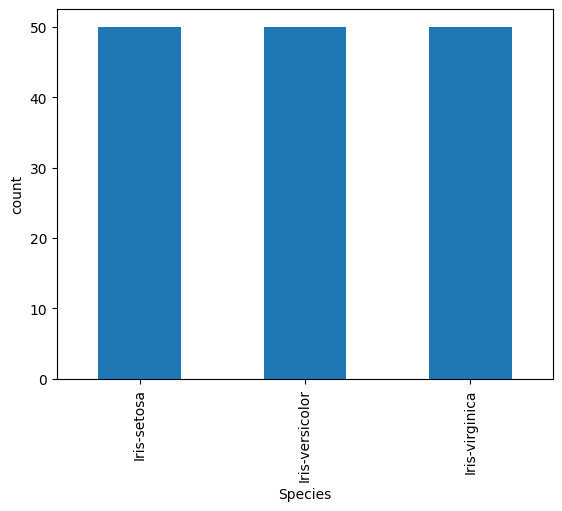

In [54]:
# bar chart for check how many no.of species are there
data1['species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('count')
plt.show()

d:\Intern Samurai\iris_model\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Figure size 700x400 with 0 Axes>

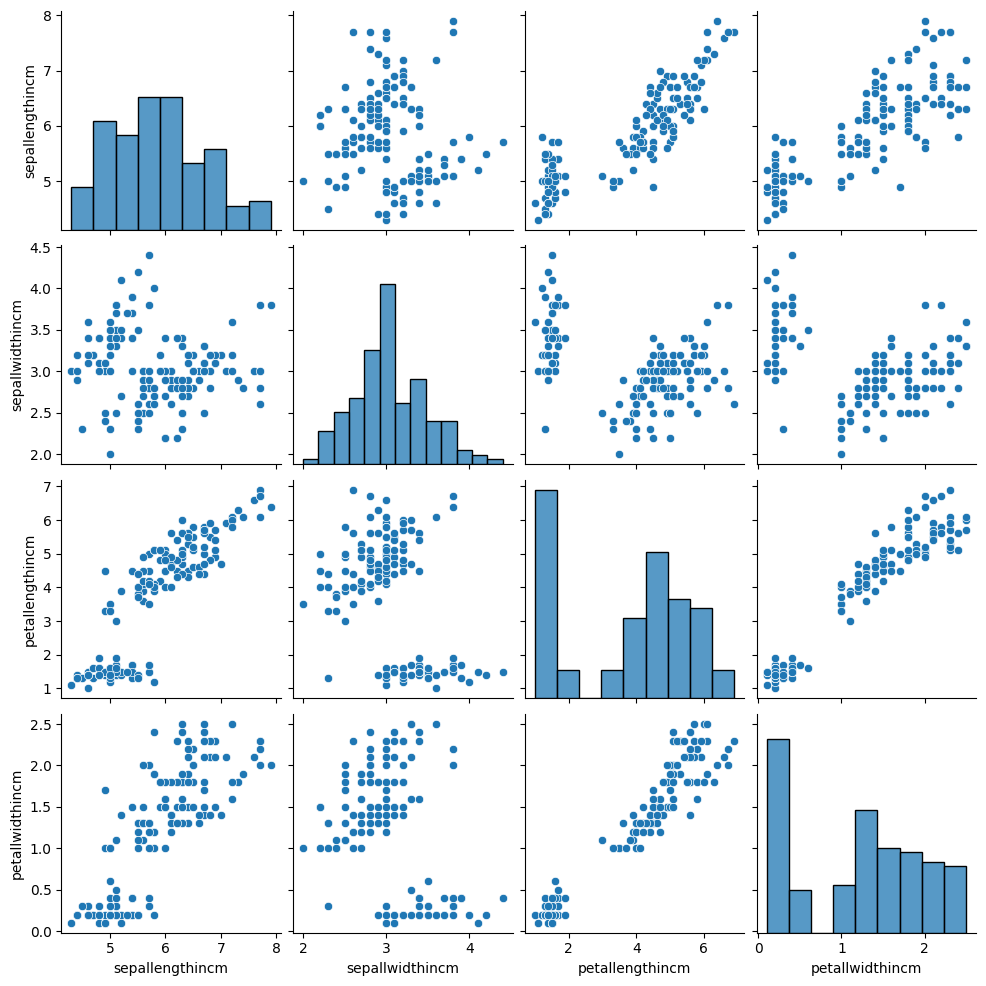

In [55]:
# let's check pairplot for data
plt.figure(figsize=(7,4))

sns.pairplot(data1)

plt.show()

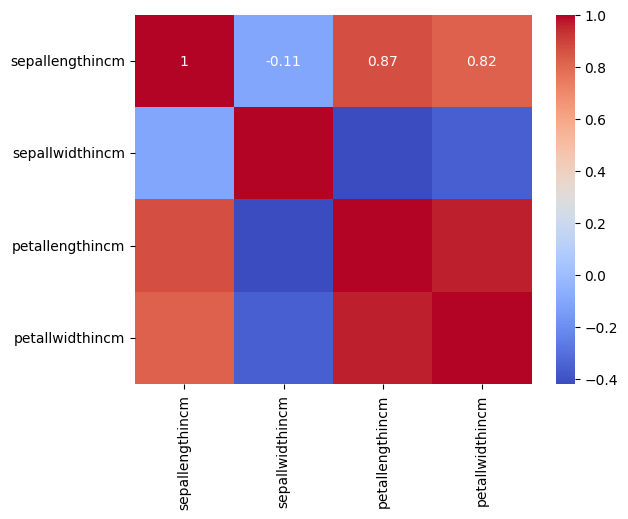

In [56]:
# correlation matrix or heatmap
# Drop the non-numeric columns
sam_data = data1.drop(columns=['species'])

# Calculate the correlation matrix
corr_data = sam_data.corr()

# Plot the heatmap
sns.heatmap(data=corr_data, annot = True, cmap = 'coolwarm')

# Show the plot
plt.show()

# Data Preprocessing

In [57]:
# label encoding Converting categorical data to numeric

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data1['species'] = encoder.fit_transform(data1['species'])

In [58]:
data1['species'].unique()

array([0, 1, 2])

In [59]:
data1['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepallengthincm  150 non-null    float64
 1   sepallwidthincm  150 non-null    float64
 2   petallengthincm  150 non-null    float64
 3   petallwidthincm  150 non-null    float64
 4   species          150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [61]:
# let's divide data as features and target variable
# X = features
# y = Target variable(Species) which model predict


X = data1.iloc[:,0:4]
y = data1.iloc[:,4:]

In [62]:
X.head()

,sepallengthincm,sepallwidthincm,petallengthincm,petallwidthincm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
import numpy as np

y = np.ravel(y)

In [64]:
# Spliting the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Model Selection
let's try model and the model which give high accuracy
models like

Liner regression

Random forest classifier

Logistic Regression

SVM

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [66]:
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

LogisticRegression()

In [67]:
lr_pred = lr_model.predict(X_val)
print(lr_pred)

[0 1 2 0 0 2 2 2 2 2 0 0 2 2 1 1 1 2 2 1 1 2 2 1 0 0 2 0 1 0]


In [68]:
print(classification_report(y_val,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [69]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, lr_pred))

[[ 9  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [70]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
RF_pred = RF_model.predict(X_val)

In [72]:
print(classification_report(y_val, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [73]:
print(confusion_matrix(y_val, RF_pred))

[[ 9  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [74]:
from sklearn.svm import SVC

SVC_model = SVC()

SVC_model.fit(X_train,y_train)

SVC()

In [75]:
SVC_pred = SVC_model.predict(X_val)

In [76]:
print(classification_report(y_val,SVC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.78      0.88      0.82         8
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [77]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
DT_pred= DT_model.predict(X_val)

In [79]:
print(classification_report(y_val,DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {
    'penalty' : ['l1','l2','elastic','None'],
    'C' : np.logspace(-3,3,10),
    'solver' : ['newton-cg','lbfgs','sag','saga'],
    'max_iter' : [100,200,500,1000]
}

clf = GridSearchCV(LogisticRegression(),param_grid, cv=5)

clf.fit(X_train,y_train)

d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elastic', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [81]:
clf.best_params_

{'C': 0.46415888336127775, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [82]:
lr_model2 = LogisticRegression(C=0.46415888336127775, max_iter=100, penalty='l1', solver='saga',random_state=43)

lr_model2.fit(X_train, y_train)

lr_pred2 = lr_model2.predict(X_val)

print(classification_report(y_val, lr_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



d:\Intern Samurai\iris_model\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [83]:
lr_model2.feature_names_in_ = None

In [84]:
import pickle

with open('lr_model.pkl','wb') as f:
  pickle.dump(lr_model2, f)

In [85]:
res = lr_model2.predict([[5.5,3.0,1.8,0.3]])
if(res==[0]):
  print("Iris-setosa")
elif(res==[1]):
  print("Iris-versicolor")
else:
  print("Iris-virginica")

Iris-setosa
